In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [21]:
# Step 1: Load the new dataset
file_path = '/content/dataset _new.xlsx'
df = pd.read_excel(file_path)

In [22]:
# Display the first few rows of the dataframe
print(df.head())

              Tree species  Ratio(width/Length)  \
0  Dimorphocalyx glabellus               0.3827   
1  Dimorphocalyx glabellus               0.3520   
2  Dimorphocalyx glabellus               0.3837   
3  Dimorphocalyx glabellus               0.3589   
4  Dimorphocalyx glabellus               0.3605   

   Length of petiole of leaf(mm)  Angle(Degrees)  
0                            9.0              48  
1                           13.0              64  
2                           10.0              63  
3                           12.0              57  
4                           10.0              72  


In [23]:
# Step 2: Preprocess the dataset
# Identify features and target variable
features = ['Ratio(width/Length)', 'Length of petiole of leaf(mm)', 'Angle(Degrees)']
target = 'Tree species'  # Replace this with the actual name of the target column in your dataset

In [24]:
# Extract features and target variable
X = df[features].values
y = df[target].values

In [25]:
# Encode the target variable if it's categorical
target_label_encoder = LabelEncoder()
y = target_label_encoder.fit_transform(y)
y = to_categorical(y)

In [26]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Define a function to build the model
def build_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y.shape[1], activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
# Step 3: Use k-fold cross-validation to evaluate the model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_accuracies = []

In [30]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

In [31]:

model = build_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

In [32]:
# Append the validation accuracy obtained during training
val_accuracy = history.history['val_accuracy'][-1]
all_accuracies.append(val_accuracy)

In [33]:
average_accuracy = np.mean(all_accuracies)
print(f'Average Validation Accuracy: {average_accuracy*100:.2f}%')

Average Validation Accuracy: 71.43%


In [34]:
# Step 4: Train the final model on the full training set
model = build_model()
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 110ms/step - loss: 1.2124 - accuracy: 0.2500 - val_loss: 1.0164 - val_accuracy: 0.6190
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0453 - accuracy: 0.4286 - val_loss: 1.0286 - val_accuracy: 0.5238
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0744 - accuracy: 0.4167 - val_loss: 1.0377 - val_accuracy: 0.5238
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0212 - accuracy: 0.5357 - val_loss: 1.0386 - val_accuracy: 0.5238
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.9217 - accuracy: 0.6667 - val_loss: 1.0405 - val_accuracy: 0.5238
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.8512 - accuracy: 0.7262 - val_loss: 1.0447 - val_accuracy: 0.5714
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7981 - accuracy: 0.7976 - val_loss: 1.0471 - val_accuracy: 0.5714
Epoch 8/100
3/3 [==

In [35]:
# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

1/1 [==============================] - 0s 29ms/step - loss: 0.4243 - accuracy: 0.9048
Test Accuracy: 90.48%


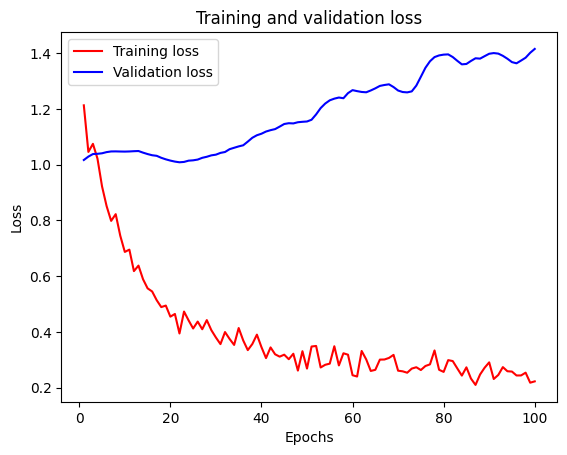

In [36]:
import matplotlib.pyplot as plt

# Assuming 'history' is defined earlier in your code
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
# Function to preprocess input data and make predictions
def predict_tree_species(input_features):
    # Convert input features to a dataframe for easier processing
    input_df = pd.DataFrame([input_features], columns=features)

    # Scale the features
    input_scaled = scaler.transform(input_df)

    # Make predictions
    prediction = model.predict(input_scaled)
    predicted_class = np.argmax(prediction, axis=1)

    # Convert the predicted class back to the original label
    predicted_species = target_label_encoder.inverse_transform(predicted_class)
    return predicted_species[0]

In [38]:
# Example usage
input_features = {
    'Ratio(width/Length)': 0.33,  # Replace with actual feature values
    'Length of petiole of leaf(mm)': 8.00,
    'Angle(Degrees)': 59.0
}

predicted_species = predict_tree_species(input_features)
print(f'Predicted Tree Species: {predicted_species}')


1/1 [==============================] - 0s 101ms/step
Predicted Tree Species: Diospyros ovalifolia


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
